https://data.wprdc.org/dataset/arrest-data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
arrest_pandas = pd.read_csv("ArrestData.csv")

arrest_pandas.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [33]:
df = pd.DataFrame(arrest_pandas)
df['ZipCodes'] = df['ARRESTLOCATION'].str.split().str[-1]
zipcodeFrequency = df['ZipCodes']
df['ZipCounts'] = df['ZipCodes'].value_counts()
df = df.drop(columns = ['INCIDENTLOCATION', 'INCIDENTZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X', 'Y'])
df = df.sort_values(by = ['ZipCodes'])
df.head(1000)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTNEIGHBORHOOD,ZipCodes,ZipCounts
24648,2005806,18188634,18.0,F,W,2018-09-24T21:49:00,Zone 1,2701 Simple Assault. / 2718(a)(1) Strangulatio...,NaN,1,NaN
1481,1976306,16179695,26.0,F,B,2016-10-04T22:45:00,Zone 1,2701 Simple Assault. / 2701(b)(2) Simple Assau...,NaN,1,NaN
36113,2020459,19220662,56.0,M,W,2019-10-29T09:48:00,Zone 1,3304 Criminal Mischief. / 3127(a) Indecent exp...,NaN,1,NaN
36109,2020455,19220436,37.0,M,W,2019-10-29T01:00:00,Zone 1,3304 Criminal Mischief. / 5505 Public Drunkenn...,NaN,1,NaN
10117,1987270,17119676,28.0,F,B,2017-06-28T12:56:00,Zone 1,2706 Terroristic Threats. / 2904 Interference ...,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9026,1986010,17099708,23.0,M,W,2017-05-31T18:40:00,4400 Block Stanton AV & McCandless AV Pittsbur...,13(a)(16) Possession of Controlled Substance /...,Stanton Heights,15201,NaN
8634,1985484,17091820,37.0,F,W,2017-05-20T00:39:00,"5100 Block Butler ST Pittsburgh, PA 15201","6308(a) Underage Purchase, Consume, Possessed ...",Upper Lawrenceville,15201,NaN
40796,2027004,20092068,40.0,M,W,2020-05-18T11:45:00,"200 Block 57th ST Pittsburgh, PA 15201",9093 Indirect Criminal Contempt,Stanton Heights,15201,NaN
42099,2028843,20127858,59.0,M,W,2020-07-11T22:53:00,"Woodbine ST & Arcade WY Pittsburgh, PA 15201",3323 Stop Signs and Yield Signs. / 3731 Drivin...,Stanton Heights,15201,NaN


In [34]:
zipcodeFrequency = df['ZipCodes']
zipcodeCounts = (zipcodeFrequency).value_counts()
zipcodeCounts = zipcodeCounts.to_frame()
print(zipcodeCounts)

       ZipCodes
15219     14814
15212      5708
15210      3223
15206      2786
15203      2149
...         ...
16066         1
16830         1
16055         1
15028         1
15071         1

[130 rows x 1 columns]


<AxesSubplot:>

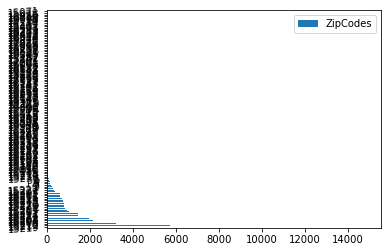

In [35]:
zipcodeCounts.plot.barh(rot = 4)

In [36]:
zipcodeCounts['pct_rank'] = zipcodeCounts.rank(pct = True)
print(zipcodeCounts)

       ZipCodes  pct_rank
15219     14814  1.000000
15212      5708  0.992308
15210      3223  0.984615
15206      2786  0.976923
15203      2149  0.969231
...         ...       ...
16066         1  0.165385
16830         1  0.165385
16055         1  0.165385
15028         1  0.165385
15071         1  0.165385

[130 rows x 2 columns]


In [37]:
condition = [
    (zipcodeCounts['pct_rank'] <= .2),
    (zipcodeCounts['pct_rank'] > .2) & (zipcodeCounts['pct_rank'] <= .4),
    (zipcodeCounts['pct_rank'] > .4) & (zipcodeCounts['pct_rank'] <= .6),
    (zipcodeCounts['pct_rank'] > .6) & (zipcodeCounts['pct_rank'] <= .8),
    (zipcodeCounts['pct_rank'] > .8)]

points = ['5', '4', '3', '2', '1']
zipcodeCounts['Points'] = np.select(condition, points)
zipcodeCounts.sort_values(by=['Points', 'ZipCodes'],inplace=True)
zipcodeCounts.index.name = "Zip_Codes"
zipcodeCounts.columns = ['Count', 'Pct_Rank', 'Points']
zipcodeCounts.head(130)

,Count,Pct_Rank,Points
Zip_Codes,,,
3,212,0.807692,1
1,249,0.815385,1
15227,275,0.823077,1
15232,358,0.830769,1
15205,385,0.838462,1
...,...,...,...
16066,1,0.165385,5
16830,1,0.165385,5
16055,1,0.165385,5


In [42]:
bestZips = zipcodeCounts.groupby(['Points'] == '1')

KeyError: False